# Module 3- Regression & Beta Calculation



   ### Welcome to the Answer notebook for Module 3 ! 
Make sure that you've submitted the module 2 notebook and unlocked Module 3 yourself before you start coding here


### Query 3.1 
Import the file 'gold.csv', which is contains the data about last 2 years price action of Indian(MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'.

One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial fucntion of the same inputs. Also, one of the 2 columns is partially filled.

>Using linear regression, find the coefficients of the inputs and using the same trained model, complete the
      entire column.
      
>Also, try to fit the other column as well using a new linear regression model. Check if the predicitons are 
      accurate.
      Mention which column is a linear function and which is a polynomial function.
      (Hint: Plotting a histogram & distplot helps in recognizing the  discrepencies in prediction, if any.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gold=pd.read_csv('GOLD.csv',parse_dates=['Date'])
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
5,2017-05-11,28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
6,2017-05-12,28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
7,2017-05-15,28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
8,2017-05-16,28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641
9,2017-05-17,28614,28170,28638,28170,15.92K,1.80%,420.0,919.376358


In [3]:
pd.to_datetime(gold['Date'])
gold.set_index('Date',drop=True,inplace=True)
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
2017-05-11,28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
2017-05-12,28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
2017-05-15,28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
2017-05-16,28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


In [4]:
gold.corr()

,Price,Open,High,Low,Pred,new
Price,1.000000,0.989758,0.995125,0.996830,0.040489,0.164504
Open,0.989758,1.000000,0.995988,0.993992,0.109153,0.058551
High,0.995125,0.995988,1.000000,0.994194,0.080394,0.142109
Low,0.996830,0.993992,0.994194,1.000000,0.014411,0.091895
Pred,0.040489,0.109153,0.080394,0.014411,1.000000,-0.006109
new,0.164504,0.058551,0.142109,0.091895,-0.006109,1.000000


In [5]:
gold1=gold.dropna()
X=gold1[['Open','Price','High','Low']]
Y=gold1['Pred']

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -6.087930159992538e-11
Coefficients: 
 [ 3.  2. -1. -4.]


In [7]:

colist=[]
for coef in regr.coef_:
    colist.append(coef)
gold['Pred']=gold.apply(lambda row: colist[0]* row.Open + colist[1]*row.Price + colist[2]*row.High + colist[3]*row.Low + regr.intercept_ if np.isnan(row.Pred) else row.Pred, axis=1)
gold

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
2017-05-04,28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
2017-05-05,28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2017-05-08,28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
2017-05-09,27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
2017-05-10,28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
2017-05-11,28022,27995,28100,27945,9.72K,0.05%,149.0,182.427089
2017-05-12,28019,28088,28195,27985,9.48K,-0.01%,167.0,141.255137
2017-05-15,28008,28049,28157,27996,8.76K,-0.04%,22.0,120.069010
2017-05-16,28109,28025,28159,28025,7.73K,0.36%,34.0,218.401641


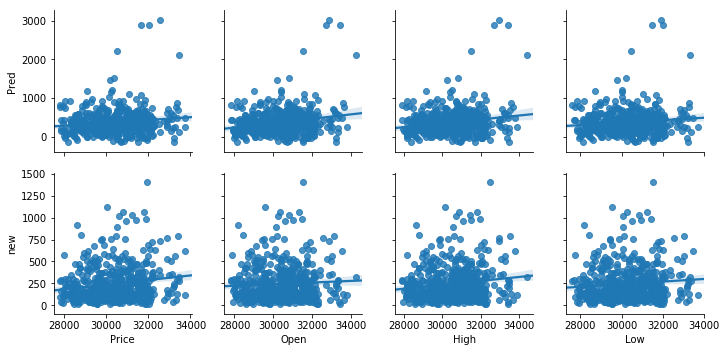

In [8]:
X1=gold[['Open','Price','High','Low']]
Y1=gold['new']
regr2 = linear_model.LinearRegression()
regr2.fit(X1, Y1)
Y_=regr2.predict(X1)
sns.pairplot(gold,y_vars=['Pred','new'],x_vars=['Price','Open','High','Low'],kind='reg')

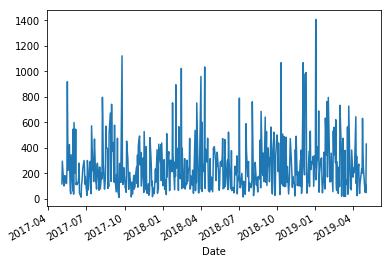

In [9]:
gold['new'].plot(kind="line")

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


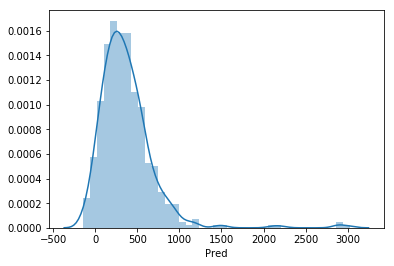

In [10]:
sns.distplot(gold['Pred'])

In [11]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred=lin_reg.predict(X_test)

In [14]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_pred,y_test));print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.41818243762314744
0.5451580164786946


In [15]:

from sklearn.preprocessing import PolynomialFeatures
lin_regressor = LinearRegression()

# pass the order of your polynomial here  
poly = PolynomialFeatures(2)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X_train)

# fit this to Linear Regressor
lin_regressor.fit(X_transform,y_train) 
X_testtrans=poly.fit_transform(X_test)

# get the predictions
y_preds = lin_regressor.predict(X_testtrans)

In [16]:
X_transform.shape

(409, 15)

In [17]:
print(metrics.mean_absolute_error(y_preds,y_test));
print(np.sqrt(metrics.mean_squared_error(y_test,y_preds)))

0.012626603112088219
0.018003636108529696


From the metrics,we can tell that the Polynomial model best suits for th3 new column than the Pred column.So,we fit the new column using the polynomial regression model trained before.

In [18]:
lin_regressor.fit(poly.fit_transform(X1),Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

/opt/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


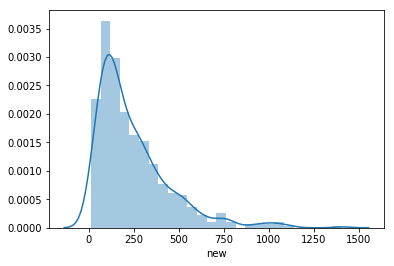

In [19]:
sns.distplot(gold['new'])

The distribution plots are almost smooth.So,we can assume that our regression models fit the given values.

# Query 3.2
Import the stock of your choosing AND the Nifty index. 
Using linear regression (OLS), calculate -
The daily Beta value for the past 3 months. (Daily= Daily returns)
The monthly Beta value. (Monthly= Monthly returns)
Refrain from using the (covariance(x,y)/variance(x)) formula. 
Attempt the question using regression.(Regression Reference) 
Were the Beta values more or less than 1 ? What if it was negative ? 
Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [20]:
nifty=pd.read_csv('Nifty50.csv',parse_dates=['Date'])
pd.to_datetime(nifty['Date'])
nifty.set_index('Date',drop=True,inplace=True)

In [21]:
daily_returns_nifty=((nifty['Close'].pct_change())*100).dropna(axis=0).last('3M')

In [22]:
daily_returns_nifty.head()

Date
2019-03-01    0.657864
2019-03-05    1.140977
2019-03-06    0.596590
2019-03-07    0.047046
2019-03-08   -0.206182
Name: Close, dtype: float64

In [23]:
data=pd.read_csv('week2.csv',parse_dates=['Date'])
pd.to_datetime(data['Date'])
data.set_index('Date',drop=True,inplace=True)

In [24]:
data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,year,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,AJANTPHARM,EQ,1616.30,1610.00,1643.40,1601.00,1636.00,1633.50,1626.20,80998,1.317191e+08,8331,24643,30.42,5,2017,0.000000,Slight or No change
2017-05-16,AJANTPHARM,EQ,1633.50,1632.50,1643.45,1610.00,1638.00,1634.25,1626.38,49236,8.007667e+07,4863,13831,28.09,5,2017,0.045914,Slight or No change
2017-05-17,AJANTPHARM,EQ,1634.25,1620.50,1668.00,1620.50,1655.00,1654.35,1651.81,210648,3.479504e+08,12022,131496,62.42,5,2017,1.229922,Positive
2017-05-18,AJANTPHARM,EQ,1654.35,1640.25,1663.95,1621.85,1639.00,1633.40,1633.59,81511,1.331553e+08,5489,37544,46.06,5,2017,-1.266358,Negative
2017-05-19,AJANTPHARM,EQ,1633.40,1640.00,1681.20,1621.50,1663.70,1670.25,1655.61,189657,3.139979e+08,8043,89768,47.33,5,2017,2.256030,Positive
2017-05-22,AJANTPHARM,EQ,1670.25,1670.00,1692.00,1648.00,1684.00,1677.95,1675.96,157923,2.646724e+08,7367,71708,45.41,5,2017,0.461009,Slight or No change
2017-05-23,AJANTPHARM,EQ,1677.95,1687.80,1696.95,1619.00,1667.20,1676.80,1661.35,209386,3.478640e+08,9880,83637,39.94,5,2017,-0.068536,Slight or No change
2017-05-24,AJANTPHARM,EQ,1676.80,1672.00,1693.00,1623.30,1638.50,1657.45,1658.59,171228,2.839967e+08,8998,74108,43.28,5,2017,-1.153984,Negative
2017-05-25,AJANTPHARM,EQ,1657.45,1650.00,1654.85,1578.05,1608.55,1616.15,1607.21,284830,4.577828e+08,18627,59249,20.80,5,2017,-2.491780,Negative


In [25]:
daily_returns_stock=data['Day_Perc_Change'].dropna(axis=0).last('3M')

In [26]:
daily_returns_stock.head()

Date
2019-03-01    0.832567
2019-03-05    0.547085
2019-03-06   -0.050380
2019-03-07   -1.865013
2019-03-08   -1.751502
Name: Day_Perc_Change, dtype: float64

In [27]:
import statsmodels.api as sm
# split dependent and independent variable
X = daily_returns_nifty
y = daily_returns_stock

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        Day_Perc_Change   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     4.829
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0333
Time:                        21:19:43   Log-Likelihood:                -94.412
No. Observations:                  46   AIC:                             192.8
Df Residuals:                      44   BIC:                             196.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0945      0.286      0.331      0.7

Beta value is the coefficient of Close i.e., 0.8812

In [28]:
monthly=nifty.resample('BM').apply( lambda x:x[-1])
monthly_returns_nifty=((monthly['Close'].pct_change())*100).dropna(axis=0)

In [29]:
monthly_returns_nifty

Date
2017-06-30   -1.043004
2017-07-31    5.841885
2017-08-31   -1.579820
2017-09-29   -1.303703
2017-10-31    5.585068
2017-11-30   -1.052219
2017-12-29    2.974121
2018-01-31    4.719534
2018-02-28   -4.850059
2018-03-30   -3.613413
2018-04-30    6.186163
2018-05-31   -0.029797
2018-06-29   -0.203518
2018-07-31    5.993859
2018-08-31    2.852992
2018-09-28   -6.421386
2018-10-31   -4.975550
2018-11-30    4.719061
2018-12-31   -0.130554
2019-01-31   -0.290908
2019-02-28   -0.355001
2019-03-29    7.703498
2019-04-30    1.068918
2019-05-31   -5.106761
Freq: BM, Name: Close, dtype: float64

In [30]:
monthly_stock=data.resample('BM').apply( lambda x:x[-1])
monthly_returns_stock=((monthly_stock['Close Price'].pct_change())*100).dropna(axis=0)

In [31]:
monthly_returns_stock.head()

Date
2017-06-30    -1.586189
2017-07-31    -9.563726
2017-08-31   -14.543893
2017-09-29    -4.954144
2017-10-31     7.512337
Freq: BM, Name: Close Price, dtype: float64

In [32]:
X = monthly_returns_nifty
y = monthly_returns_stock

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            Close Price   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     3.048
Date:                Fri, 19 Jul 2019   Prob (F-statistic):             0.0948
Time:                        21:19:43   Log-Likelihood:                -88.307
No. Observations:                  24   AIC:                             180.6
Df Residuals:                      22   BIC:                             183.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7418      2.075     -0.840      0.4

Beta value of the stock is 0.89.
This indicates that the volatility of our stock is less than most of the other stocks and it is steadier and slower.
If Beta is greater than 1,the risk is higher and if beta is less than 1,it indicates a negative relation with the national stock index.It suggests an inverse relationship.

In [ ]:
model.predict([[1,2,3]])